In [159]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
#load dataset
data=pd.read_csv('diabetes.csv')
df=data.copy()
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### Data Cleaning ### 

Q2

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [162]:
#Checking for duplicates
df.duplicated().sum()

0

In [163]:
#checking for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Observations ###
- There are no duplicates and missing values

In [164]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Observations 
- There exists some records where features values are zero but they can't be zeros.
- Let's impute them

In [165]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Handling Outliers

<AxesSubplot:>

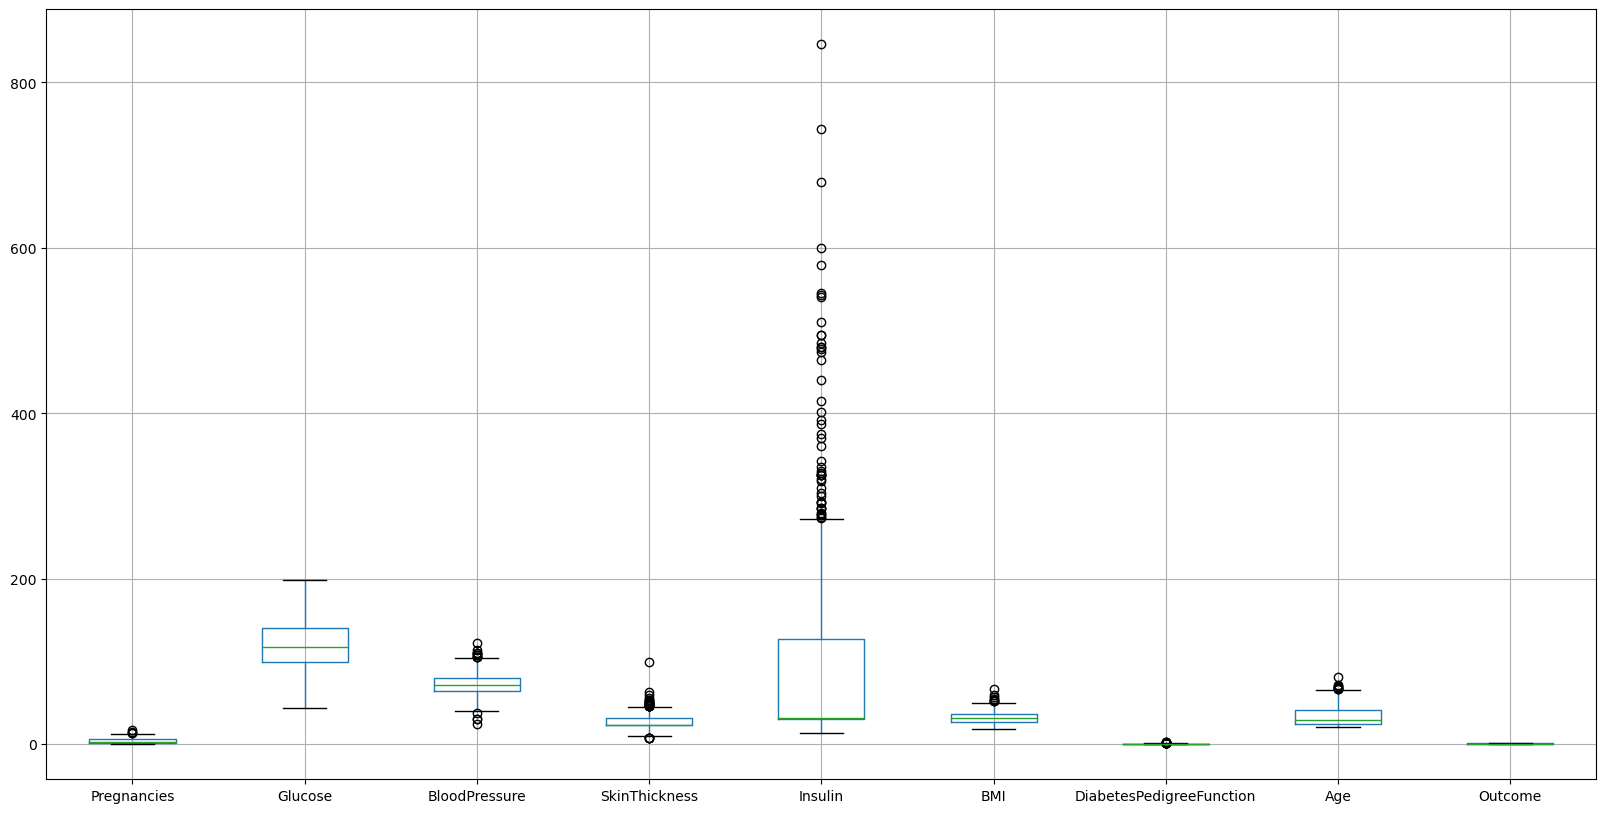

In [166]:
#Let's visualize them
df.boxplot(figsize=(20,10))

### Observations
-There are many outliers in insulin feature.
- Let's remove the outliers

In [167]:
def rmOutliers(data):
    q1=data.quantile(0.25)
    q2=data.quantile(0.75)
    iqr=q2-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q2+1.5*iqr
    return data[(data>=lower_limit) & (data<=upper_limit) ]

In [168]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

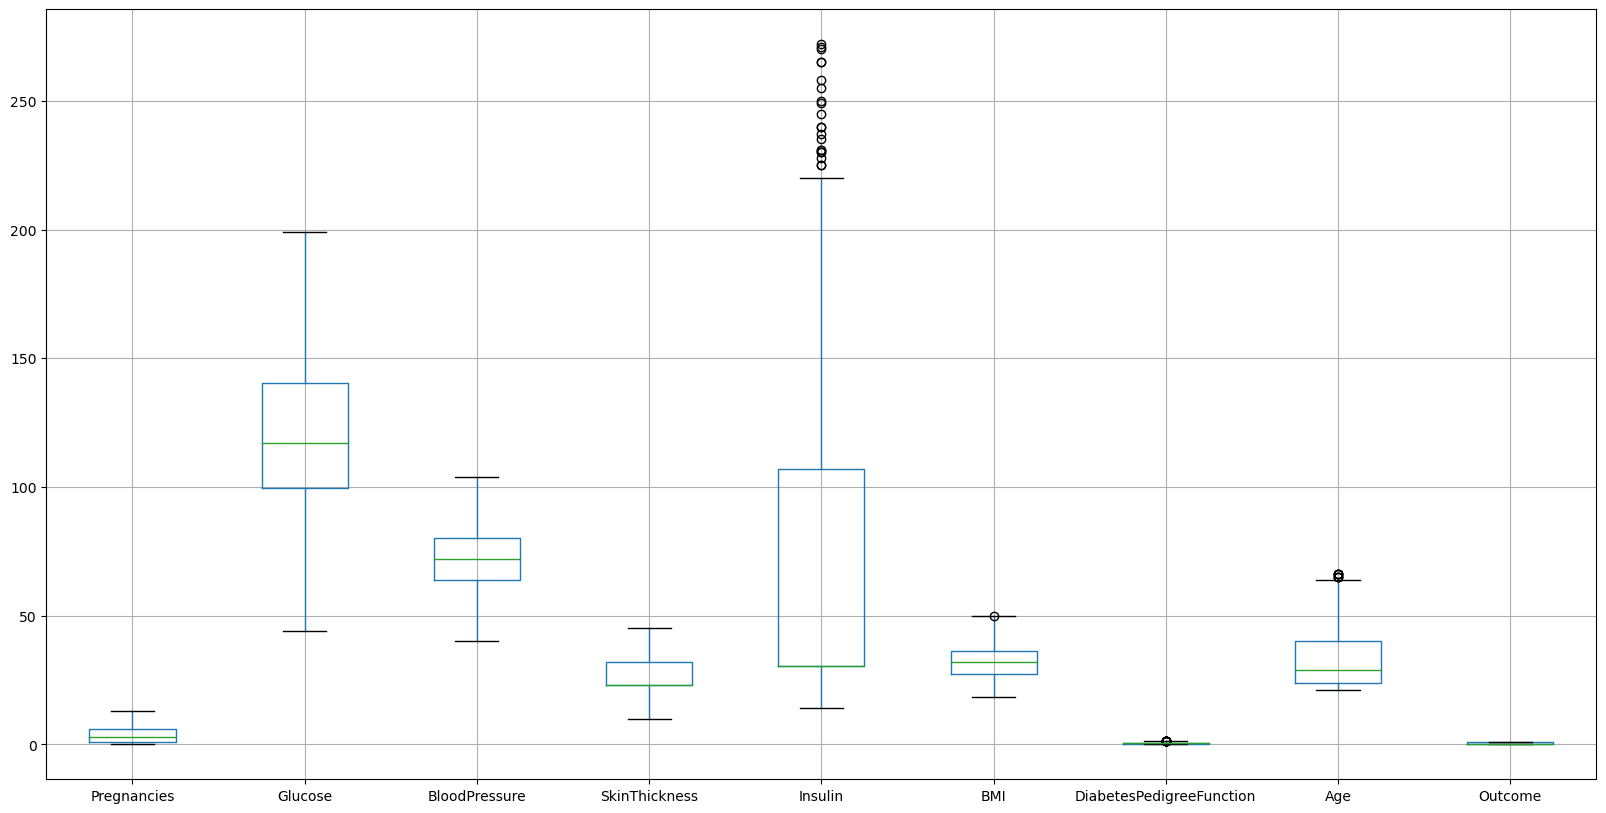

In [169]:
for col in df.columns:
    df[col]=rmOutliers(df[col])
df.boxplot(figsize=(20,10))

### Observation
- There are some outliers, but the number is quite few

In [170]:
df.isna().sum()

Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               35
Insulin                     49
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

### Observations
-After removal of outliers, some records which are very near to the range, are filled with Nan values. Hence, let's remove them

In [171]:
df.dropna(inplace=True)

In [172]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [173]:
df.shape

(636, 9)

# EDA 

Q1

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

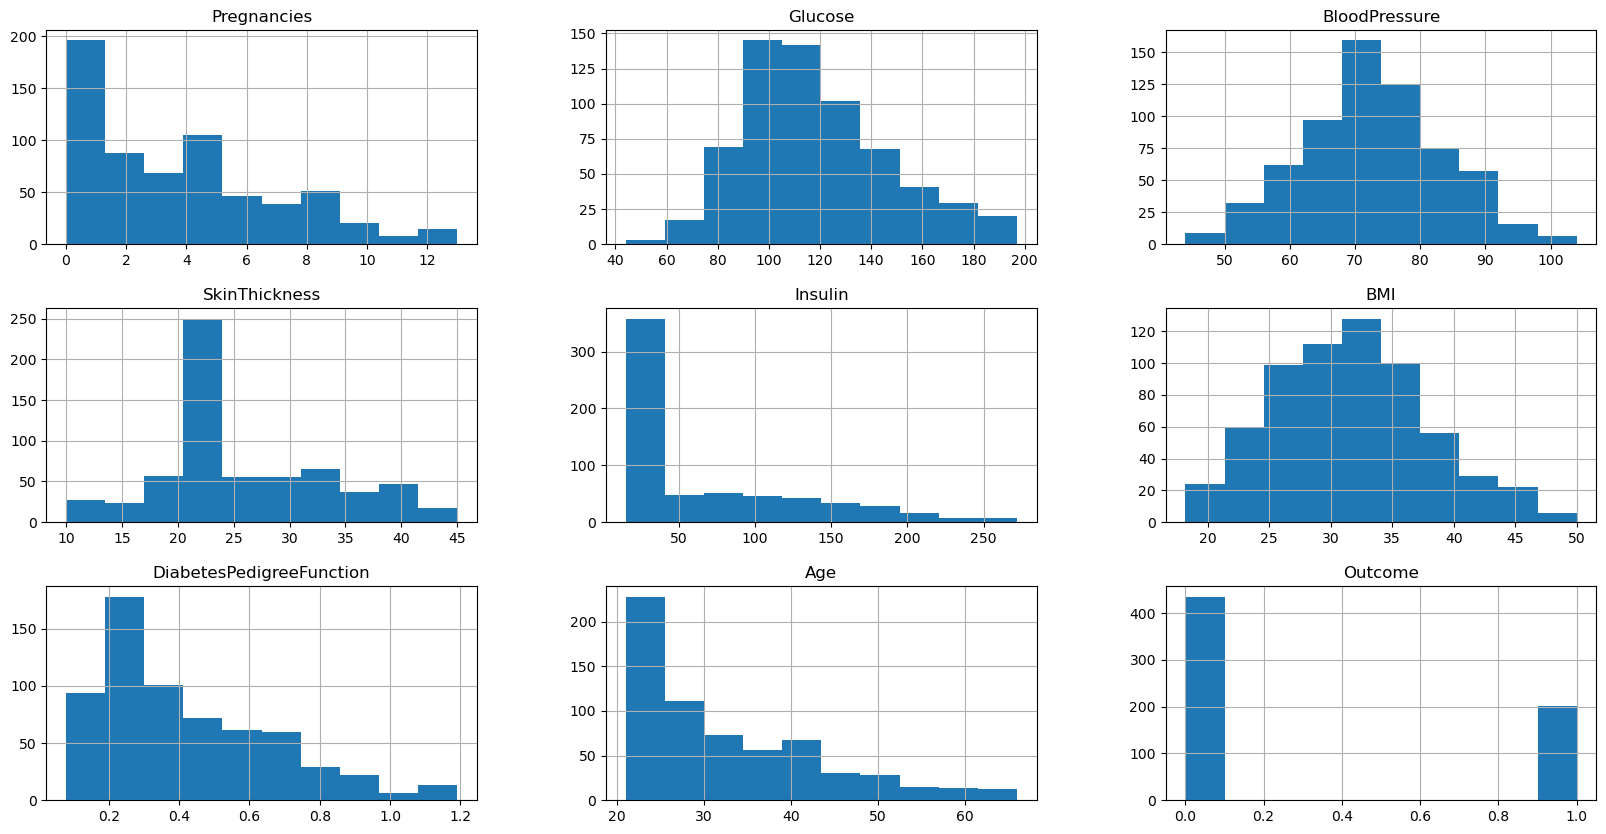

In [174]:
#Visualizing distributions
df.hist(figsize=(20,10))

### Observations
- Glucose and Blood Pressure resemble standard normal distribution
- Scaling values down in necessary but DT algorithm is used, so not necessary


<AxesSubplot:>

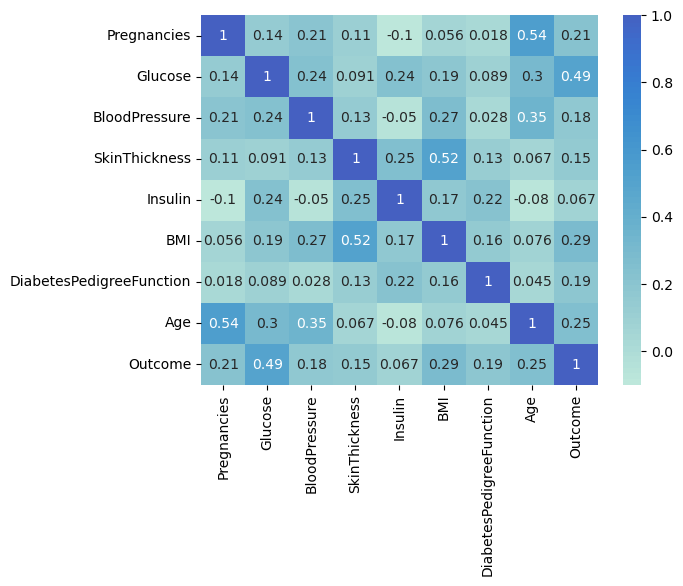

In [175]:
#Let's visualize correlation
sns.heatmap(df.corr(),annot=True,center=2)

### Observation
- Glucose, BMI and Age are highly correlated to the target variable

# Split the Data
Q3

In [176]:
X=df.iloc[:,:-1]
y=df['Outcome']
print(X.shape,y.shape)

(636, 8) (636,)


In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


# HyperParameter Tuning
Q4

In [178]:
#Let's create the model
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [179]:
parameters={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':np.arange(1,10),
    'max_features':['auto','sqrt','log2'],
}

In [180]:
X_train.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [181]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(classifier,param_grid=parameters,n_jobs=-1,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)

c:\Users\dsai9\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dsai9\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dsai9\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\dsai9\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [182]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [188]:
#let's create the model
classifier=DecisionTreeClassifier(criterion='gini',max_depth=6,max_features='sqrt',splitter='best')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [189]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[111  16]
 [ 38  26]]
0.7172774869109948
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       127
           1       0.62      0.41      0.49        64

    accuracy                           0.72       191
   macro avg       0.68      0.64      0.65       191
weighted avg       0.70      0.72      0.70       191



### Observations
- Accuracy is 71 percent.
- Here False negatives must be reduced, so recall is an important metric. Recall fro zero is 0.83. Not good

In [190]:
#Visualizing Roc curve
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = classifier.predict_proba(X_test)[:, 1]
y_scores

array([0.        , 0.        , 0.5       , 0.        , 0.        ,
       1.        , 0.42105263, 0.        , 0.9375    , 0.        ,
       0.        , 0.        , 0.25      , 0.02564103, 0.75      ,
       1.        , 0.02564103, 0.        , 0.2       , 0.        ,
       0.25      , 0.36363636, 0.        , 0.14285714, 0.375     ,
       0.02564103, 0.02564103, 0.9375    , 0.02564103, 0.9375    ,
       0.02564103, 0.75      , 0.        , 0.2       , 0.375     ,
       0.8125    , 0.42105263, 0.36363636, 0.42105263, 0.375     ,
       1.        , 0.02564103, 0.42105263, 0.2       , 0.36363636,
       0.91666667, 1.        , 0.36363636, 0.14285714, 1.        ,
       0.36363636, 0.        , 1.        , 0.        , 0.91666667,
       0.8125    , 0.75      , 0.36363636, 0.375     , 0.36363636,
       0.02564103, 0.02564103, 0.02564103, 0.8       , 0.36363636,
       0.36363636, 0.        , 0.02564103, 0.02564103, 0.        ,
       0.02564103, 0.        , 0.02564103, 0.02564103, 0.36363

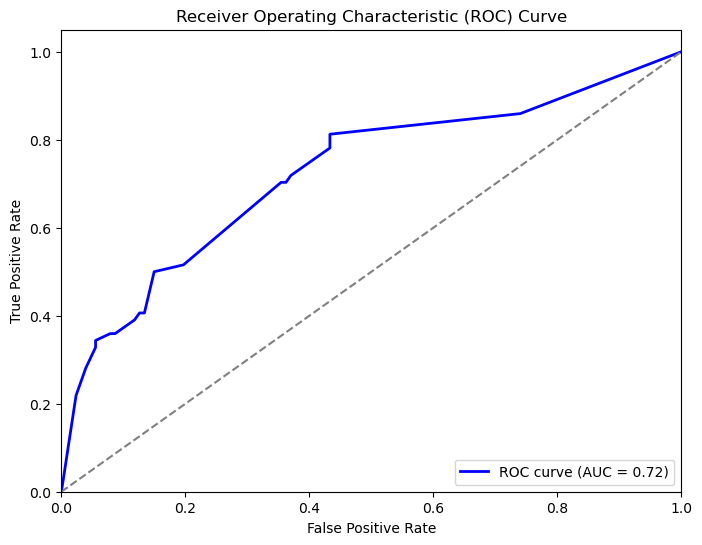

In [191]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### Q6

[Text(0.37740384615384615, 0.9285714285714286, 'X[1] <= 123.5\ngini = 0.426\nsamples = 445\nvalue = [308, 137]'),
 Text(0.13942307692307693, 0.7857142857142857, 'X[7] <= 28.5\ngini = 0.256\nsamples = 279\nvalue = [237, 42]'),
 Text(0.09615384615384616, 0.6428571428571429, 'X[0] <= 7.5\ngini = 0.112\nsamples = 168\nvalue = [158, 10]'),
 Text(0.07692307692307693, 0.5, 'X[5] <= 45.4\ngini = 0.102\nsamples = 167\nvalue = [158, 9]'),
 Text(0.057692307692307696, 0.35714285714285715, 'X[1] <= 113.5\ngini = 0.092\nsamples = 166\nvalue = [158, 8]'),
 Text(0.038461538461538464, 0.21428571428571427, 'X[3] <= 31.5\ngini = 0.106\nsamples = 142\nvalue = [134, 8]'),
 Text(0.019230769230769232, 0.07142857142857142, 'gini = 0.05\nsamples = 117\nvalue = [114, 3]'),
 Text(0.057692307692307696, 0.07142857142857142, 'gini = 0.32\nsamples = 25\nvalue = [20, 5]'),
 Text(0.07692307692307693, 0.21428571428571427, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.09615384615384616, 0.35714285714285715, 'gin

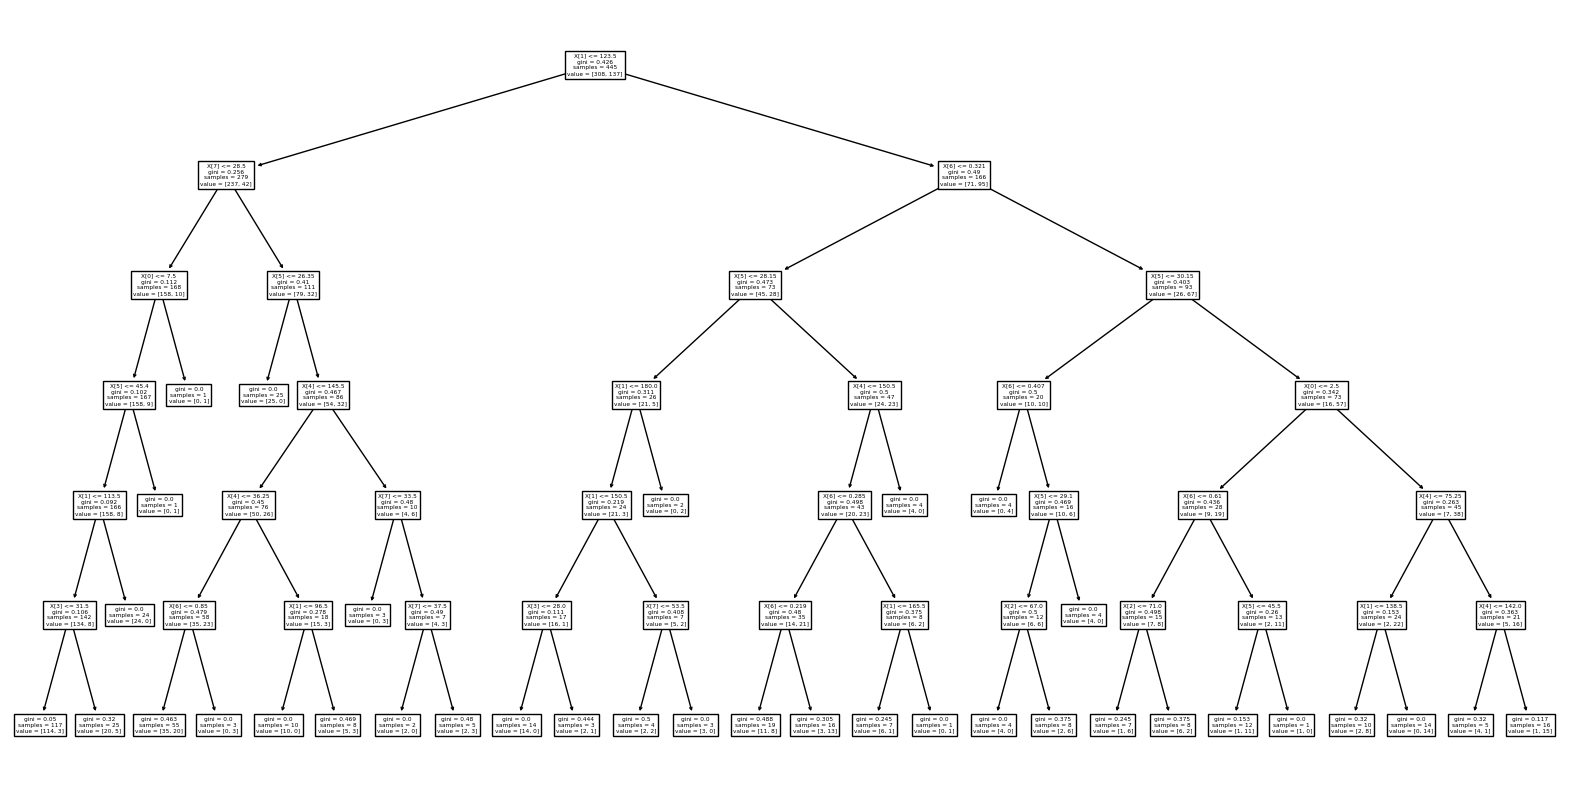

In [192]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier)

Q6

By observing the DT, Glucose, Age, BMI are important features for the prediction of diabetes.

Q7

Yes, testing is necessary, but don't have extra test data